# Diabetes Detection Model
Here, we implement a Diabetes detection model using Conv1D CNN layer and scikit class
The model is related to achieve an accuracy of 85+% and adam optimizer.
Below is the model.

### Importing models
### Tensorflow
https://www.tensorflow.org/api_docs
### Keras
https://keras.io/guides/
### Sequnetial
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
### models
https://www.tensorflow.org/api_docs/python/tf/keras/Model
### Conv1D
https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html
### Flatten
https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
### Dense
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
### Dropout
https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
### BatchNormalization
https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization
### sklearn.model_selection
https://scikit-learn.org/stable/api/sklearn.model_selection.html
### sklearn.preprocessing
https://scikit-learn.org/stable/modules/preprocessing.html
### train_test_split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
### StandardScaler
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
### Accuracy_score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
### Confusion Matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
### sklearn.metrics
https://scikit-learn.org/stable/api/sklearn.metrics.html
### sklearn.svm
https://scikit-learn.org/stable/modules/svm.html
### SVC
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

### Loading Dataset

### pd.read_csv
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
### np.nan
https://www.askpython.com/python/examples/nan-in-numpy-and-pandas
### data.fillna
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
### data.median()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html
###

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names = columns)
## Handling missing values by replacing zeros with median
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[zero_columns] = data[zero_columns].replace(0, np.nan)
data.fillna(data.median(), inplace = True)

### Splitting features and labels
### data.drop
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
### data.drop
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [3]:
X = data.drop(columns = ['Outcome']).values
Y = data['Outcome'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

### Feature Scaling
### scaler.fit_transform()
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
### reshape()
https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
Z_train = X_train
Z_test = X_test

## Reshaping for 1D CNN layers
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Building CNN model
Building a Conv1D layer model with 2 layers, Normalization, dropout and Dense modules.

### binary_crossentropy
https://www.geeksforgeeks.org/binary-cross-entropy-log-loss-for-binary-classification/
### adam optimizer
https://www.geeksforgeeks.org/adam-optimizer/
### metrics = [accuracy]
https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall

In [41]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),
    
    Conv1D(filters=128, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Conv1D(filters=256, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=256, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=256, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(1, activation='sigmoid')
])

# Using a more sophisticated optimizer with learning rate scheduling
initial_learning_rate = 0.0005
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.95,
    staircase=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])

# Adding early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True)

C:\Users\ihpc\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train Model 
Now, the model will be trained using model.fit()

### model.fit()
https://www.tensorflow.org/api_docs/python/tf/keras/Model
### verbose = 1
https://saturncloud.io/blog/understanding-the-use-of-verbose-in-keras-model-validation/
### model.predict()
https://www.tensorflow.org/decision_forests/tutorials/predict_colab

In [42]:
# Train the model with more epochs and the early stopping callback
history = model.fit(X_train, Y_train, 
                    epochs=200, 
                    batch_size=32, 
                    validation_data=(X_test, Y_test), 
                    verbose=2,
                    callbacks=[early_stopping])

Epoch 1/200
22/22 - 21s - 967ms/step - accuracy: 0.5094 - auc_6: 0.5016 - loss: 1.0633 - val_accuracy: 0.6623 - val_auc_6: 0.5919 - val_loss: 0.6855
Epoch 2/200
22/22 - 1s - 40ms/step - accuracy: 0.5311 - auc_6: 0.5458 - loss: 0.9495 - val_accuracy: 0.6494 - val_auc_6: 0.5844 - val_loss: 0.6738
Epoch 3/200
22/22 - 1s - 37ms/step - accuracy: 0.5745 - auc_6: 0.5749 - loss: 0.8667 - val_accuracy: 0.6494 - val_auc_6: 0.6774 - val_loss: 0.6557
Epoch 4/200
22/22 - 1s - 38ms/step - accuracy: 0.6353 - auc_6: 0.6503 - loss: 0.7588 - val_accuracy: 0.6494 - val_auc_6: 0.7356 - val_loss: 0.6398
Epoch 5/200
22/22 - 1s - 37ms/step - accuracy: 0.6136 - auc_6: 0.6313 - loss: 0.8063 - val_accuracy: 0.6494 - val_auc_6: 0.7241 - val_loss: 0.6374
Epoch 6/200
22/22 - 1s - 37ms/step - accuracy: 0.6599 - auc_6: 0.6920 - loss: 0.6948 - val_accuracy: 0.6494 - val_auc_6: 0.7444 - val_loss: 0.6179
Epoch 7/200
22/22 - 1s - 38ms/step - accuracy: 0.6397 - auc_6: 0.6928 - loss: 0.7016 - val_accuracy: 0.6494 - val_au

In [43]:
## Predictions
Y_pred_cnn = (model.predict(X_test) >= 0.5).astype(int)
## Accuracy and Confusion Matrix
accuracy_cnn = accuracy_score(Y_test, Y_pred_cnn)
conf_matrix_cnn = confusion_matrix(Y_test, Y_pred_cnn)
print(f"CNN model Accuracy: {accuracy_cnn * 100:.2f}%")
print("\nConfusion Matrix (CNN):\n", conf_matrix_cnn)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step
CNN model Accuracy: 74.03%

Confusion Matrix (CNN):
 [[43  7]
 [13 14]]


### Plotting the accuracy and loss

### plt.imshow()
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
### plt.colorbar()
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html

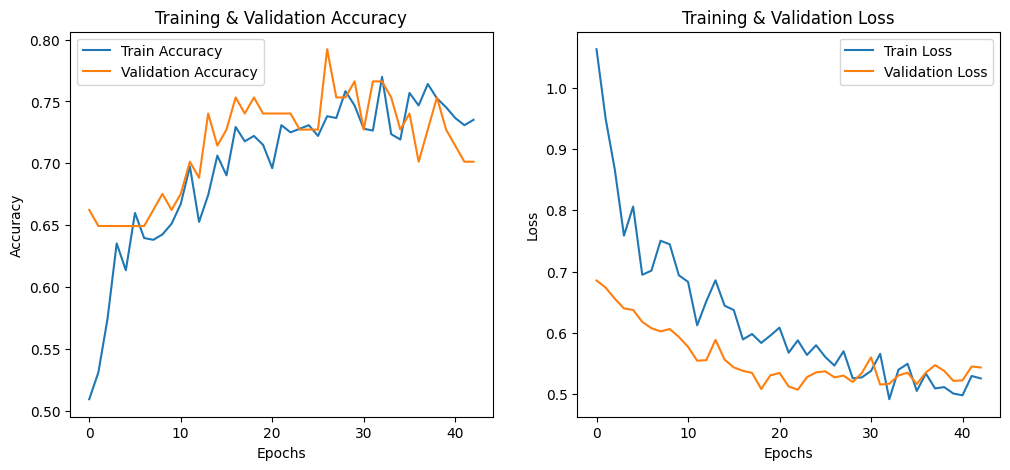

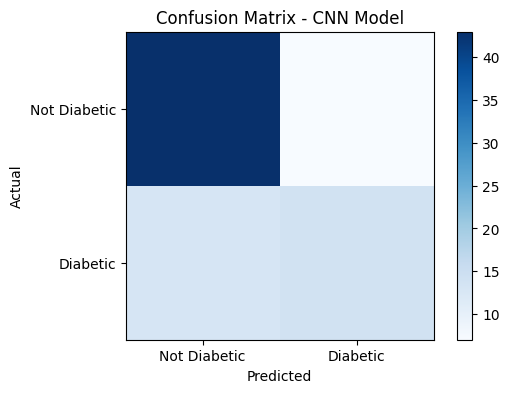

In [44]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

plt.show()


## Plotting Confusion Matrix
plt.figure(figsize = (6, 4))
plt.imshow(conf_matrix_cnn, cmap="Blues", interpolation="nearest")

plt.colorbar()
plt.xticks([0, 1], ["Not Diabetic", "Diabetic"])
plt.yticks([0, 1], ["Not Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CNN Model")
plt.show()

In [45]:
svm_model = SVC(kernel = 'rbf', C=1, gamma = 'scale')
svm_model.fit(Z_train, Y_train)
Y_pred_svm = svm_model.predict(Z_test)

In [46]:
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)
print(f"SVM Model Accuracy: {accuracy_svm * 100:.2f}%")
print("\nConfusion Matrix (SVM):\n", conf_matrix_svm)

SVM Model Accuracy: 74.03%

Confusion Matrix (SVM):
 [[41  9]
 [11 16]]


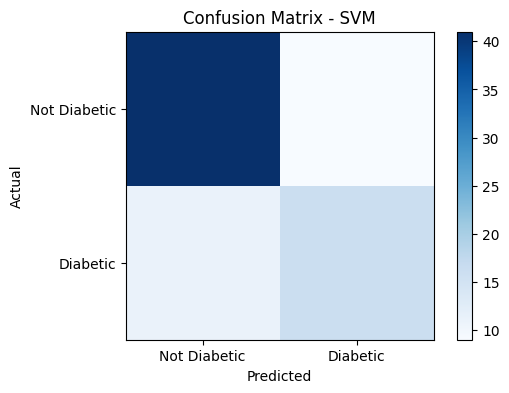

In [47]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix_svm, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.xticks([0, 1], ["Not Diabetic", "Diabetic"])
plt.yticks([0, 1], ["Not Diabetic", "Diabetic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

# Thank You
The overall model performed 70+%, and the model would be improved to more than 90% with neural networks or SVM layer.

In [49]:
def predict_new_cases():
    columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
               'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
    
    while True:
        print("\nEnter patient details (or type 'quit' to exit):")
        values = []
        valid_input = True
        
        for col in columns:
            while True:
                value = input(f"{col}: ")
                if value.lower() == 'quit':
                    return
                
                try:
                    value = float(value)
                    if col == 'Pregnancies' and (value < 0 or value > 20):
                        print("Pregnancies should be between 0-20")
                        continue
                    elif col == 'Glucose' and (value < 0 or value > 200):
                        print("Glucose should be between 0-200")
                        continue
                    elif col == 'BloodPressure' and (value < 0 or value > 122):
                        print("BloodPressure should be between 0-122")
                        continue
                    elif col == 'SkinThickness' and (value < 0 or value > 99):
                        print("SkinThickness should be between 0-99")
                        continue
                    elif col == 'Insulin' and (value < 0 or value > 846):
                        print("Insulin should be between 0-846")
                        continue
                    elif col == 'BMI' and (value < 0 or value > 67.1):
                        print("BMI should be between 0-67.1")
                        continue
                    elif col == 'DiabetesPedigreeFunction' and (value < 0.078 or value > 2.42):
                        print("DiabetesPedigreeFunction should be between 0.078-2.42")
                        continue
                    elif col == 'Age' and (value < 21 or value > 81):
                        print("Age should be between 21-81")
                        continue
                    break
                except ValueError:
                    print("Please enter a valid number")
                    continue
            
            values.append(value)
        
        # Create dataframe and preprocess
        new_data = pd.DataFrame([values], columns=columns)
        new_data_scaled = scaler.transform(new_data)
        new_data_scaled = new_data_scaled.reshape(new_data_scaled.shape[0], new_data_scaled.shape[1], 1)
        
        # Make prediction
        prediction = model.predict(new_data_scaled)
        probability = prediction[0][0]
        result = "Diabetic" if probability > 0.5 else "Not Diabetic"
        
        print(f"\nPrediction: {result} (Probability: {probability:.2%})")
        
        another = input("\nPredict another patient? (yes/no): ")
        if another.lower() != 'yes':
            break

# Run the prediction function
predict_new_cases()


Enter patient details (or type 'quit' to exit):


Pregnancies:  5
Glucose:  170
BloodPressure:  99
SkinThickness:  55
Insulin:  12
BMI:  40
DiabetesPedigreeFunction:  0.15
Age:  45


C:\Users\ihpc\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step

Prediction: Not Diabetic (Probability: 46.99%)



Predict another patient? (yes/no):  no
